# NFPA-CBA Example 2 : Warehouse building (WB)

## Notebook initialization

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

## Introduction
This Notebook presents an example application of the prototype methodology for cost-benefit analysis. This case study considers a building area of 6000 m2 (a medium-sized warehouse, based on (BRE Global,2013; Cebr 2014), with groundplan of 60m x 100m). The cost-benefit of the following fire protection systems is investigated: (i) sprinkler system, and (ii) compartmentation.  

The reference design has neither a sprinkler system nor compartmenation. The cost-benefit of three design alternatives are investigated: (A) presence of sprinkler system only; (B) presence of compartmenation only; (C) presence of both sprinkler system and compartmentation.  

The benefit evaluation is done considering the event tree diagram visualized below. Three scenarios are identified: (I) Fire suppressed by sprinkler system; (II) Fire not suppressed by sprinklers but suppressed by the fire and rescue service; (III) Fire not suppressed by sprinklers and not suppressed by the fire and rescue service.

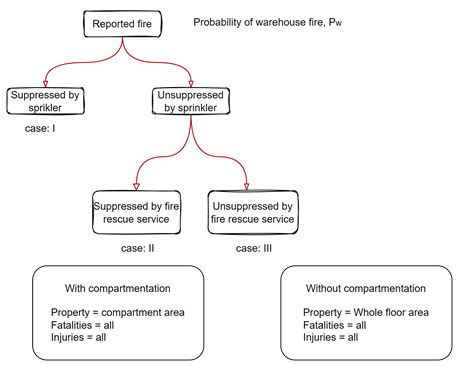  

## I. Input
User input in this area.
Note: All monetary values in 2022 USD

### I.1 Building characteristics
Medium warehouse building (6000m2). Single story assumed (Warehouse with Metal Panel/ Rigid Steel).  
Cost evaluation of structure and the cost of fire protection measures considering (RSMeans 2022), see background document.

In [2]:
S_area = 6000 # [m2] Floor area of structure
Construction_Cost = 1070.8 + 4.30 # [USD/m2] Construction cost; 1080 and Smoke detectors cost; 4.30 evaluated through (RSMeans, 2022)
Demol_cost = 101.36 # [USD/m2] (RSMeans, 2022) Demolition cost; 101.36 evaluated through (RSMeans, 2022)
Disposal_cost = 10.70  # [USD/m2] (RSMeans, 2022) Disposal cost; 10.70 evaluated through (RSMeans, 2022)

### I.2 Discount rate and obsolescence rate

In [3]:
g = 0.03 # [1/year] continuous discount rate; 3% based on (Fischer, 2014)
o = 0    # [1/year] obsolescence rate; 0% - building obsolescence neglected

### I.3 Cost of fire protection

#### I.3.a Investment cost fire protection

In [4]:
## sprinkler system
c_ins_unitcost= 61.67 # [USD/m2] System installation cost; 61.67 for sprinkler system with wet pipe water sprinkler based on (RSMeans, 2022)
c_ins = c_ins_unitcost*S_area  # [USD] Total system installation cost

In [5]:
## Compartmentation
# compartment design; user input (see background document)
n_comp = np.array([1,2,3,4,6,8]) # Number of compartments considered in the warehouse Building; default: np.array([1,2,3,4,6,8])
Comp_wall_len=np.array([0,60,120,160,220,280]) # [m] total compartment wall length for design case

# compartment wall cost per m
Cost_wall = 1050 # [USD/m] Unit cost of comparmentation wall; 1050 based on (RSMeans, 2022)
c_comp = Cost_wall * Comp_wall_len[1:] # [USD] Total cost of compartmentation wall (note: first entry in default code is the entry "single compartment" of the reference design)

#### I.3.b Maintenance cost fire protection

In [6]:
## sprinkler system
m_sp= 0.05 * c_ins # [USD per year] annual maintenance cost; 5% of sprinkler installation cost based on (Hopkin, 2019)- maintenance cost assumed to include replacement of parts for system lifetime extension
m_com=0 * c_comp # [USD per year] annual maintenance considered for compartmentation; 0% of installation cost considered here (i.e., no maintenance cost for compartmentation)

### I.4 Benefit of fire protection
Benefit evaluation as reduction in cost of fire losses, assessed through flowchart listed in the Introduction.
<br> See background document for discussion.

#### I.4.a Fire frequency

In [7]:
## fire frequency
lambda_fi= 0.00156 # [1/year] fire frequency for storage (ignition frequency + unsuccessful immediate suppression by occupants); 0.00156 based on (Manes and Rush, 2019) 

#### I.4.b Fire barrier reliability

In [8]:
## sprinkler reliability
psup_sp = 0.95 # [-] probability of succesful fire suppression by sprinklers; 0.92-0.98 based on (Vassart et al., 2012)

## fire and rescue service suppression success rate
p_frs = 0.1 # [-] probability of succesful fire suppression by fire rescue service; 0.95 based on (Vassart et al., 2012); 0.1 adopted for remote location without possibility of early FRS intervention

#### I.4.c Fire-induced losses

In [9]:
## valuation of risk to life
VSL = 5.657*10**6 # [2022 USD] Value of Statistical Life (VSL); 5.657*10**6 based on (ISO 2394:2015) 
xi_in = (0.047 * VSL) # [2022 USD] valuation of average injury risk; 0.047*VSL based on (Zhuang et al., 2017)

In [10]:
## [fatalities/fire]
Nf_civilian = 1.5/1000 # [fatality/fire] probability of civilian fatalities; 1.5 fatalities per 1000  fires based on (NFPA 2022)
Nf_firefighter_onground = 2.8/1e5 # [fatality/fire] probability of firefighter fireground fatality; 2.8/1e5 based on (NFPA, 2022)
Nf_firefighter_response = 2.5/1e5 # [fatality/fire] probability of firefighter response fatality; 2.5/1e5 based on (NFPA, 2022)

In [11]:
## [injuries/fire]
Ni_civilian = 1.3/100 # [injury/fire] civilian injuries; 1.3 injuries per 100 reported fires based on (NFPA, 2022)
Ni_firefighter_onground = 16.2/1000 # [injury/fire] firefighter fireground injuries; 16.2 injuries per 1000 reported fires based on (NFPA, 2022)
Ni_firefighter_response = 3.7/1000  # [injury/fire] firefighter response injuries; 3.7 injuries per 1000 reported fires based on (NFPA, 2022)

In [12]:
## property loss
S_loss_0 = 41.30 # [m2] average damage area in case of no sprinkler suppression; 41.30 based on (Manes and Rush, 2019)
S_loss_s = 22.59 # [m2] average damage area in case of sprinkler suppression; 22.59 based on (Manes and Rush, 2019)

eps_loss_content = 2.0 # [-] property loss multiplication factor; eps_loss = ((building loss + content loss) / building loss); 2.0 based on (FEMA, 2015)
eps_loss_indirect = 1.65 # [-] total property loss multiplication factor accounting for indirect costs; 1.65 based on (Ramachandran and Hall, 2002)

## II. Design fire risk evaluation

### II.1 Calculation of fire scenario parameters

In [13]:
# Unit replacement cost
Replace_cost = Construction_Cost + Demol_cost + Disposal_cost # [USD/m2] replacement cost as sum of demolition, disposal and reconstruction

# Compartment area
comp_area = np.array(S_area/n_comp) # Compartmentation area

### II.2 Scenario consequence evalluation
Evaluation of consequences for identified scenarios (event tree- Scenarios I, II and III)

#### II.2.a Scenario I "Suppression by sprinkler"

In [14]:
### Fatalities and injuries
# Fatalities
Nf_sup = 0 + Nf_firefighter_response # [fatality/fire] total fatality rate with sprinkler suppression
# Injuries
redux_Nin_civ=0.57 # [-] reduction factor for civilian injuries; 57% reduction in civilian injuries, based on (Butry, 2009)
Nin_sup = (1-redux_Nin_civ)*Ni_civilian + Ni_firefighter_response # [injury/fire] total injury rate with sprinkler suppression

### Valuation of fatalities and injuries
Df_sup=Nf_sup*VSL # [USD/fire] valuation expected life loss
Din_sup = Nin_sup*xi_in # [USD/fire] valuation expected injuries

### Material loss
xi_d_sup =  S_loss_s * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss given fire

### Total loss valuation
D_I=Df_sup+Din_sup+xi_d_sup # [USD] expected value fire-induced loss, scenario I "fire suppressed by sprinkler"

#### II.2.b Scenario II "Not suppressed by sprinklers, suppressed by fire and rescue service"

In [15]:
### Fatalities and injuries
# Fatalities
Nf_sup_frs = Nf_civilian + Nf_firefighter_onground + Nf_firefighter_response # [fatality/fire] total fatality rate without sprinkler suppression but suprressed by fire rescue service
# Injuries
Nin_sup_frs = Ni_civilian + Ni_firefighter_onground + Nf_firefighter_response # [injury/fire] total injury rate without sprinkler suppression but suppressed by fire rescue service

### Valuation of fatalities and injuries
Df_sup_frs=Nf_sup_frs*VSL # [USD/fire] valuation expected life loss
Din_sup_frs = Nin_sup_frs*xi_in # [USD/fire] valuation expected injuries

### Material loss
xi_d_sup_frs =  S_loss_0 * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss

### Total loss valuation
D_II=Df_sup_frs+Din_sup_frs+xi_d_sup_frs # [USD] expected value fire-induced loss, scenario II "fire not suppressed by sprinklers but suppressed by fire and rescue service"

#### II.2.c Scenario III "Not suppressed"

In [16]:
### Fatalities and injuries
# Fatalities
Nf_unsup_frs = Nf_civilian + Nf_firefighter_onground + Nf_firefighter_response # [fatality/fire] total fatality rate without sprinkler suppression
# Injuries
Nin_unsup_frs = Ni_civilian + Ni_firefighter_onground + Nf_firefighter_response # [injury/fire] total injury rate without sprinkler suppression

### Valuation of fatalities and injuries
Df_unsup_frs=Nf_unsup_frs*VSL # [USD/fire] valuation expected life loss
Din_unsup_frs = Nin_unsup_frs*xi_in # [USD/fire] valuation expected injuries

### Material loss
xi_d_unsup_frs = comp_area * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss

### Total loss valuation
D_III=Df_unsup_frs+Din_unsup_frs+xi_d_unsup_frs # [USD] expected value fire-induced loss, scenario III "fire not suppressed"

## III. PNV calculation

### Total safety system cost *C+A*

#### III.1.a Investment cost, *C<sub>I</sub>*

In [17]:
C_I_sp=c_ins # PNV investment cost for sprinkler system
C_I_com=c_comp # PNV investment cost for compartmentation 

#### III.1.b PNV maintenance cost, *C<sub>M</sub>*

In [18]:
C_M_sp=m_sp/g # PNV of maintenace cost for sprinkler system
C_M_com=m_com/g # PNV of maintenace cost for compartmentation

#### III.1.c Obsolescence cost, *C<sub>A</sub>*

In [19]:
C_A_sp=C_I_sp*o/g # PNV of obsolescence cost sprinkler system
C_A_com=C_I_com*o/g # PNV of obsolescence cost compartmentation

#### III.1.d Total safety system cost *C+A*

In [20]:
net_C_a=C_I_sp+ C_M_sp + C_A_sp # Sprinkler only (Design a)
net_C_b = C_I_com + C_M_com + C_A_com # Compartmenation only (Design b) - first entry is the reference design of a single compartment
net_C_c = net_C_a + net_C_b # Sprinkler and compartmentation both (Design c)

#### III.2 Net Benefit B-D

#### III.2.a Fire induced losses reference design, *B* (no sprinkler system and no compartmentation)

In [21]:
# Expected loss reference design
Dref  =  p_frs * D_II + (1-p_frs) * D_III[0]

# Present net value of reference design
B = Dref * lambda_fi/g # [USD] PNV fire-induced losses reference design

#### III.2.b Fire-induced losses trial designs

In [22]:
## Expected losses with design A, B and C
# Design a (Sprinkler system only)
Da = psup_sp * D_I + (1-psup_sp) * (p_frs * D_II + (1-p_frs) * D_III[0])

# Design b (Compartmenation only)
Db  =  p_frs * D_II + (1-p_frs) * D_III[1:]

# Design c (Fire sprinkler and Compartmenation both)
Dc  =  psup_sp * D_I + (1-psup_sp) * (p_frs * D_II + (1-p_frs) * D_III[1:])

In [23]:
## PNV of design a, b and c
D_a = Da *lambda_fi/g  # [USD] PNV expected risk for alternative design a (sprinkler system only)
D_b = Db *lambda_fi/g  # [USD] PNV expected risk for alternative design b (compartmentation only)
D_c = Dc *lambda_fi/g  # [USD] PNV expected risk for alternative design c (sprinkler system and compartmentation)

#### III.2.c PNV net benefit, *B-D*

In [24]:
netB_a = B - D_a # [USD] Net benefit for alternative design a (sprinkler system only)
netB_b = B - D_b # [USD] Net benefit for alternative design b (compartmentation only)
netB_c = B - D_c # [USD] Net benefit for alternative design c (sprinkler system and compartmentation)

## IV. Cost-Benefit evaluation, Z (USD, Present net value)

In [25]:
## PNV of proposed alternative design
Z_a = netB_a - net_C_a # [USD] Present net value for alternative design a (sprinkler system only)
Z_b = netB_b - net_C_b # [USD] Present net value for alternative design b (compartmentation only)
Z_c = netB_c - net_C_c # [USD] Present net value for alternative design c (sprinkler system and compartmentation)

## Benefit cost ratio of proposed alternative design
BCR_a=netB_a/net_C_a 
BCR_b=netB_b/net_C_b
BCR_c=netB_c/net_C_c

## Print to screen
print("\nThe PNV for alternative design a (sprinkler system only) is {0:,.0f} [USD]; the BCR is {1:.2f}".format(Z_a,BCR_a))
print("\nThe PNV for alternative design b (compartmentation only) is, with")
for i,Z in enumerate(Z_b):
    print("\t{0:,.0f} compartments: {1:,.0f} [USD]; the BCR is {2:.2f}".format(n_comp[i+1],Z,BCR_b[i]))
print("\nThe PNV for alternative design c (sprinkler system and compartmentation) is, with")
for i,Z in enumerate(Z_c):
    print("\t{0:,.0f} compartments: {1:,.0f} [USD]; the BCR is {2:.2f}".format(n_comp[i+1],Z,BCR_c[i]))


The PNV for alternative design a (sprinkler system only) is 55,463 [USD]; the BCR is 1.06

The PNV for alternative design b (compartmentation only) is, with
	2 compartments: 487,035 [USD]; the BCR is 8.73
	3 compartments: 607,380 [USD]; the BCR is 5.82
	4 compartments: 657,052 [USD]; the BCR is 4.91
	6 compartments: 685,725 [USD]; the BCR is 3.97
	8 compartments: 668,561 [USD]; the BCR is 3.27

The PNV for alternative design c (sprinkler system and compartmentation) is, with
	2 compartments: 19,964 [USD]; the BCR is 1.02
	3 compartments: -33,868 [USD]; the BCR is 0.97
	4 compartments: -71,285 [USD]; the BCR is 0.94
	6 compartments: -129,701 [USD]; the BCR is 0.89
	8 compartments: -190,409 [USD]; the BCR is 0.85


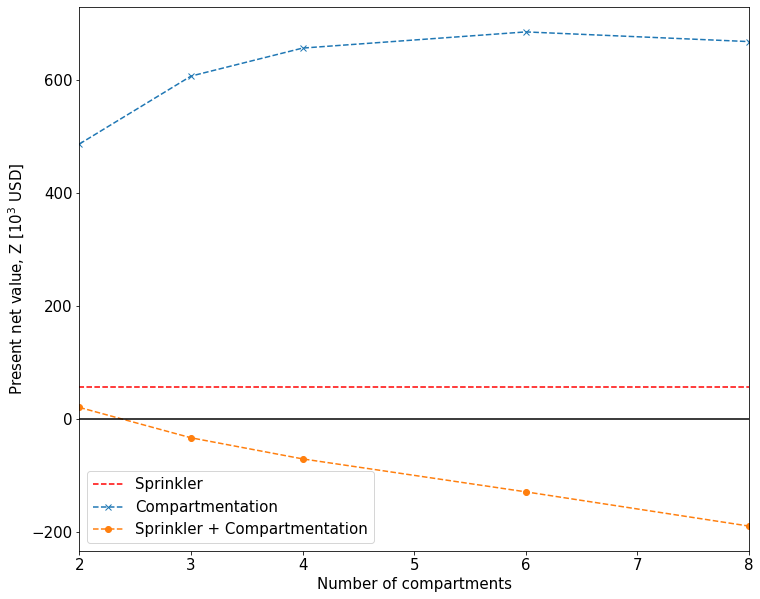

In [26]:
# Plot for cost-benefit of sprinkler and the cost-benefit of compartmentation for failure of sprinkler and fire rescue service
plt.rcParams.update({'font.size': 15})
fig,ax  = plt.subplots(1,1)

ax.plot([n_comp[0],n_comp[-1]],[Z_a/1000,Z_a/1000],'--',color='r')
ax.plot(n_comp[1:],Z_b/1000,linestyle='--',marker='x')
ax.plot(n_comp[1:],Z_c/1000,linestyle='--',marker='o')

ax.plot([2,8],[0,0],'k')
ax.set_xlim([2,8])
ax.set_xlabel('Number of compartments')
ax.set_ylabel('Present net value, Z [$10^3$ USD]')
ax.legend(['Sprinkler','Compartmentation','Sprinkler + Compartmentation'])
fig.set_size_inches(12,10)

# Example 2 - Parameter study

### Parameter study with VSL, indirect cost, and efficiency of sprinkler system

#### Function definition PNV Z, to allow parameter study VSL,psup_sp and eps_loss_indirect

In [27]:
# Function combining above model assumption for parameter study
def Zvalue(VSL,psup_sp,eps_loss_indirect,p_frs):
    ## I. Input ##
    ##############
    ## I.4.c Fire-induced losses
    xi_in = (0.047 * VSL) # [2021 USD] valuation of average injury risk; 0.047*VSL based on (Zhuang et al., 2017)
    
    ## II. Design fire risk evaluation ##
    #####################################    
    ## II.2.a Scenario I "suppression by sprinkler"
    ### Valuation of fatalities and injuries
    Df_sup=Nf_sup*VSL # [USD/fire] valuation expected life loss
    Din_sup = Nin_sup*xi_in # [USD/fire] valuation expected injuries
    ### Material loss
    xi_d_sup =  S_loss_s * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss given fire
    ### Total loss valuation
    D_I=Df_sup+Din_sup+xi_d_sup # [USD] expected value fire-induced loss, scenario I "fire suppressed by sprinkler"
    
    ## II.2.b Scenario II "Not suppressed by sprinklers, suppressed by fire and rescue service"
    ### Valuation of fatalities and injuries
    Df_sup_frs=Nf_sup_frs*VSL # [USD/fire] valuation expected life loss
    Din_sup_frs = Nin_sup_frs*xi_in # [USD/fire] valuation expected injuries
    ### Material loss
    xi_d_sup_frs =  S_loss_0 * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss
    ### Total loss valuation
    D_II=Df_sup_frs+Din_sup_frs+xi_d_sup_frs # [USD] expected value fire-induced loss, scenario II "fire not suppressed by sprinklers but suppressed by fire and rescue service"
    
    ## II.2.c Scenario III "Not suppressed"
    ### Valuation of fatalities and injuries
    Df_unsup_frs=Nf_unsup_frs*VSL # [USD/fire] valuation expected life loss
    Din_unsup_frs = Nin_unsup_frs*xi_in # [USD/fire] valuation expected injuries
    ### Material loss
    xi_d_unsup_frs = comp_area * Replace_cost * eps_loss_content * eps_loss_indirect # [USD] property loss
    ### Total loss valuation
    D_III=Df_unsup_frs+Din_unsup_frs+xi_d_unsup_frs # [USD] expected value fire-induced loss, scenario III "fire not suppressed"
    
    ## III. PNV calculation ##
    ##########################
    ## III.2.a Fire-induced losses reference design, B
    # Expected loss reference design
    Dref  =  p_frs * D_II + (1-p_frs) * D_III[0]
    # Present net value of reference design
    B = Dref * lambda_fi/g # [USD] PNV fire-induced losses reference design
    
    ## III.2.b Fire-induced losses trial designs
    ## Expected losses with design A, B and C
    Da = psup_sp * D_I + (1-psup_sp) * (p_frs * D_II + (1-p_frs) * D_III[0]) # Design a (Sprinkler system only)
    Db  =  p_frs * D_II + (1-p_frs) * D_III[1:] # Design b (Compartmenation only)
    Dc  =  psup_sp * D_I + (1-psup_sp) * (p_frs * D_II + (1-p_frs) * D_III[1:]) # Design c (Fire sprinkler and Compartmenation both)
    ## PNV evaluation
    D_a = Da *lambda_fi/g; D_b = Db *lambda_fi/g; D_c = Dc *lambda_fi/g
    
    ## III.2.c PNV net benefit, B-D
    netB_a = B - D_a; netB_b = B - D_b; netB_c = B - D_c
    
    ## IV. Cost-Benefit evaluation ##
    #################################  
    ## PNV of proposed alternative design
    Z_a = netB_a - net_C_a # [USD] Present net value for alternative design a (sprinkler system only)
    Z_b = netB_b - net_C_b # [USD] Present net value for alternative design b (compartmentation only)
    Z_c = netB_c - net_C_c # [USD] Present net value for alternative design c (sprinkler system and compartmentation)
    ## Benefit cost ratio of proposed alternative design
    BCR_a=netB_a/net_C_a 
    BCR_b=netB_b/net_C_b
    BCR_c=netB_c/net_C_c
    
    return Z_a,Z_b,Z_c,BCR_a,BCR_b,BCR_c

#### Example of usage function Zvalue

In [28]:
## Example application of function Zvalue - verification base values

# input values
psup_sp = 0.95 # [-] probability of succesful fire suppression by sprinklers; 0.95 based on (Vassart et al., 2012)
p_frs = 0.1 # [-] probability of succesful fire suppression by fire rescue service; 0.95 based on (Vassart et al., 2012); 0.1 adopted for remote location without possibility of early FRS intervention
VSL = 5.657*10**6 # [2021 USD] Value of Statistical Life (VSL); 5.657*10**6 based on (ISO 2394:2015) 
eps_loss_indirect = 1.65 # [-] total property loss multiplication factor accounting for indirect costs; 1.65 based on (Ramachandran and Hall, 2002)

# CBA 
Z_a,Z_b,Z_c,BCR_a,BCR_b,BCR_c=Zvalue(VSL,psup_sp,eps_loss_indirect,p_frs) # [USD] PNV of proposed safety measure

## Print to screen
print("\nThe PNV for alternative design a (sprinkler system only) is {0:,.0f} [USD]; the BCR is {1:.2f}".format(Z_a,BCR_a))
print("\nThe PNV for alternative design b (compartmentation only) is, with")
for i,Z in enumerate(Z_b):
    print("\t{0:,.0f} compartments: {1:,.0f} [USD]; the BCR is {2:.2f}".format(n_comp[i+1],Z,BCR_b[i]))
print("\nThe PNV for alternative design c (sprinkler system and compartmentation) is, with")
for i,Z in enumerate(Z_c):
    print("\t{0:,.0f} compartments: {1:,.0f} [USD]; the BCR is {2:.2f}".format(n_comp[i+1],Z,BCR_c[i]))


The PNV for alternative design a (sprinkler system only) is 55,463 [USD]; the BCR is 1.06

The PNV for alternative design b (compartmentation only) is, with
	2 compartments: 487,035 [USD]; the BCR is 8.73
	3 compartments: 607,380 [USD]; the BCR is 5.82
	4 compartments: 657,052 [USD]; the BCR is 4.91
	6 compartments: 685,725 [USD]; the BCR is 3.97
	8 compartments: 668,561 [USD]; the BCR is 3.27

The PNV for alternative design c (sprinkler system and compartmentation) is, with
	2 compartments: 19,964 [USD]; the BCR is 1.02
	3 compartments: -33,868 [USD]; the BCR is 0.97
	4 compartments: -71,285 [USD]; the BCR is 0.94
	6 compartments: -129,701 [USD]; the BCR is 0.89
	8 compartments: -190,409 [USD]; the BCR is 0.85


#### Parameter study and visualization for design alternative a (sprinklers only) - p_frs modified
Indicates how VSL has no real impact on PNV; and the effect of p_sup is very small.  
Sprinkler installation is deemed efficient (PNV>0) as the indirect cost factor approaches 3000% (i.e. as the cost factor approaches 30)

Text(0, 0.5, 'Present net value, Z [$10^3$ USD]')

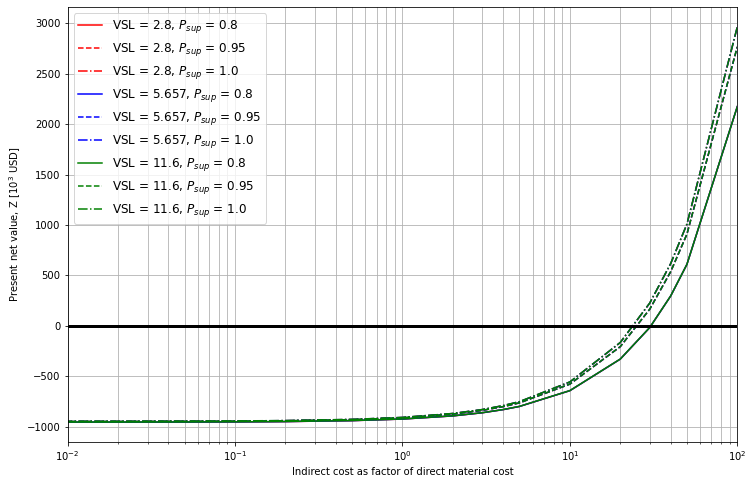

In [29]:
# VSL, Indirect cost, sprinkler efficiency
# %matplotlib qt 
%matplotlib inline

p_frs = 0.95 # [-] probability of succesful fire suppression by fire rescue service; 0.95 based on (Vassart et al., 2012); 0.1 adopted for remote location without possibility of early FRS intervention
VSL_var= np.array([2.8, 5.657, 11.6]) *1e+6 # 11.6 USD (Department of Transportation, 2011)
psup_var = np.array([0.8,0.95,1.0])
Ind_cost_var = np.array([0,2,5,10,20,50,100,200,300,400,500,1000,2000,3000,4000,5000,10000])

nCases = len(VSL_var)*len(psup_var)

m_psup,m_VSL = np.meshgrid(psup_var,VSL_var)
m_VSL = m_VSL.ravel();m_psup = m_psup.ravel()

Z_a = np.zeros((len(Ind_cost_var),len(m_VSL)))

color = (['r','r','r','b','b','b','g','g','g'])
linestyle = (['solid','dashed','dashdot','solid','dashed','dashdot','solid','dashed','dashdot'])

legends = []

fig,ax = plt.subplots(1,1)

for num in np.arange(len(m_VSL)):
    for j in np.arange(len(Ind_cost_var)):
        Z_a[j,num]=Zvalue(m_VSL[num],m_psup[num],1+Ind_cost_var[j]/100,p_frs)[0]
    
    ax.plot(Ind_cost_var/100,Z_a[:,num]/1000,color=color[num],linestyle=linestyle[num])
    legends.append('VSL = '+str(m_VSL[num]/1e6)+', $P_{sup}$ = '+str(m_psup[num]))
     

ax.legend(legends,fontsize=12)
ax.plot([0,100],[0,0],linestyle='solid',color='k',linewidth=3.0)
ax.set_xlim([0.01,100])
ax.set_xscale('log')
ax.grid(which='both',axis='both')
fig.set_size_inches(12,8)
ax.set_xlabel('Indirect cost as factor of direct material cost');ax.set_ylabel('Present net value, Z [$10^3$ USD]')


#### Design with Compartmentation, design alternative b (compartmentation only), p_frs modified
Note that the highest BCR is not necessarily obtained for the optimum design solution.  
See e.g., the optimum for an indirect cost factor of 20.


The PNV for alternative design b (compartmentation only) is, with
	2 compartments: 325,914 [USD]; the BCR is 6.17
	3 compartments: 392,551 [USD]; the BCR is 4.12
	4 compartments: 415,370 [USD]; the BCR is 3.47
	6 compartments: 417,189 [USD]; the BCR is 2.81
	8 compartments: 386,599 [USD]; the BCR is 2.31

The PNV approach indicates 6 compartments as the optimum for an indirect cost factor of 20 (i.e. 2,000%).
The BCR is however the largest for 2 compartments because the investment is smaller.


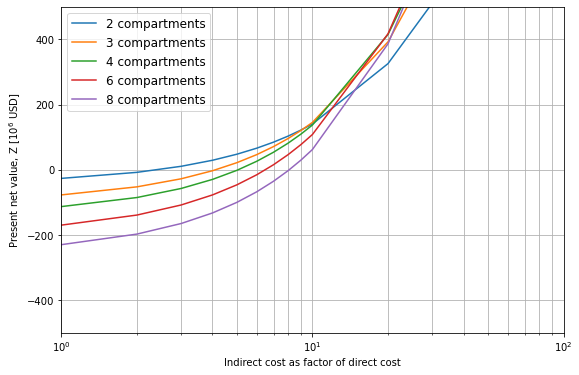

In [30]:
# VSL, Indirect cost, compartmentation efficiency
# %matplotlib qt 
%matplotlib inline

Ind_cost_var = np.array([100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,10000]) # [%] indirect cost factor as percentage of total direct cost
p_frs = 0.95 # [-] probability of succesful fire suppression by fire rescue service; 0.95 based on (Vassart et al., 2012); 0.1 adopted for remote location without possibility of early FRS intervention

Z_b = np.zeros((len(Ind_cost_var),len(n_comp[1:])))
BCR_b = np.zeros((len(Ind_cost_var),len(n_comp[1:])))
legends = []

for j in np.arange(len(Ind_cost_var)):
    out=Zvalue(VSL,psup_sp,1+Ind_cost_var[j]/100,p_frs)
    Z_b[j,:]=out[1]; BCR_b[j,:]=out[4]

fig,ax = plt.subplots(1,1)
for i,comp in enumerate(n_comp[1:]):
    ax.plot(Ind_cost_var/100,Z_b[:,i]/10**3)
    legends.append(str(comp)+' compartments')
     

ax.legend(legends,fontsize=12)
# ax.plot([0,100],[0,0],linestyle='solid',color='k',linewidth=3.0)
ax.set_xlim([1,100])
ax.set_ylim([-500,500])
ax.set_xscale('log')
ax.grid(which='both',axis='both')
fig.set_size_inches(9,6)
ax.set_xlabel('Indirect cost as factor of direct cost');ax.set_ylabel('Present net value, Z [$10^6$ USD]')

## Print to screen
ind_cost=2000 # [%] indirect cost factor as percentage of total direct cost
index=np.where(Ind_cost_var==ind_cost)[0][0]
print("\nThe PNV for alternative design b (compartmentation only) is, with")
for i,Z in enumerate(Z_b[index,:]):
    print("\t{0:,.0f} compartments: {1:,.0f} [USD]; the BCR is {2:.2f}".format(n_comp[i+1],Z,BCR_b[index,i]))
print("\nThe PNV approach indicates 6 compartments as the optimum for an indirect cost factor of 20 (i.e. 2,000%).\nThe BCR is however the largest for 2 compartments because the investment is smaller.")